# Лабораторная работа "Цифровой осциллограф"
Радиофизическая лаборатория, ФРКТ МФТИ 


**Штундер Арсений**

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [5]:
def analyse(file, const_level=0, window='boxcar'):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    plt.rcParams['font.size'] = '12'
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
        
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
#     plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
#     plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
#     plt.show()

<IPython.core.display.Javascript object>


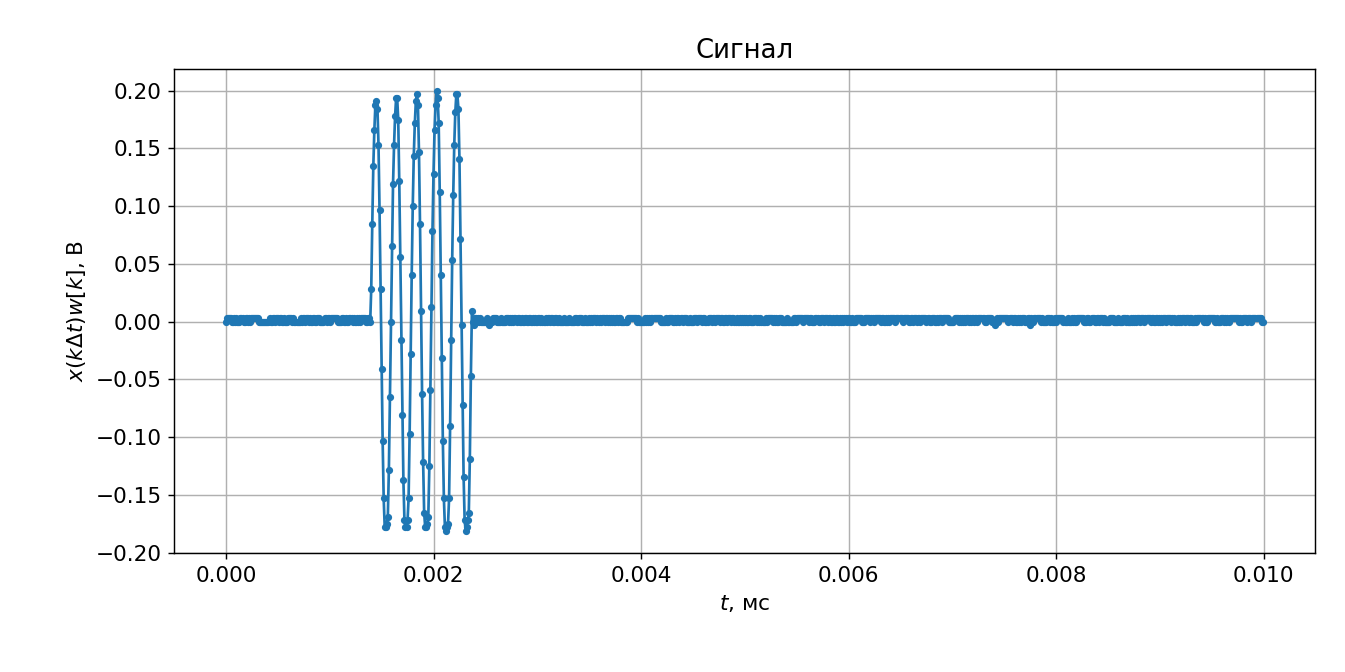

<IPython.core.display.Javascript object>


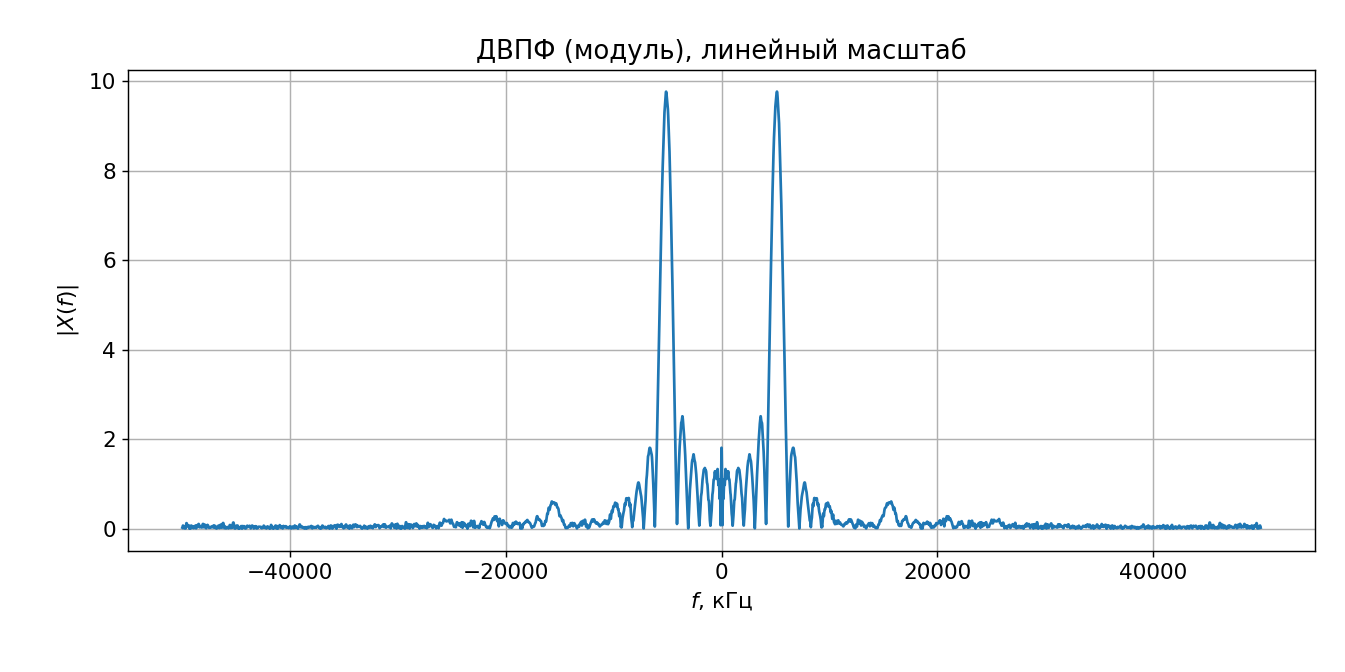

<IPython.core.display.Javascript object>


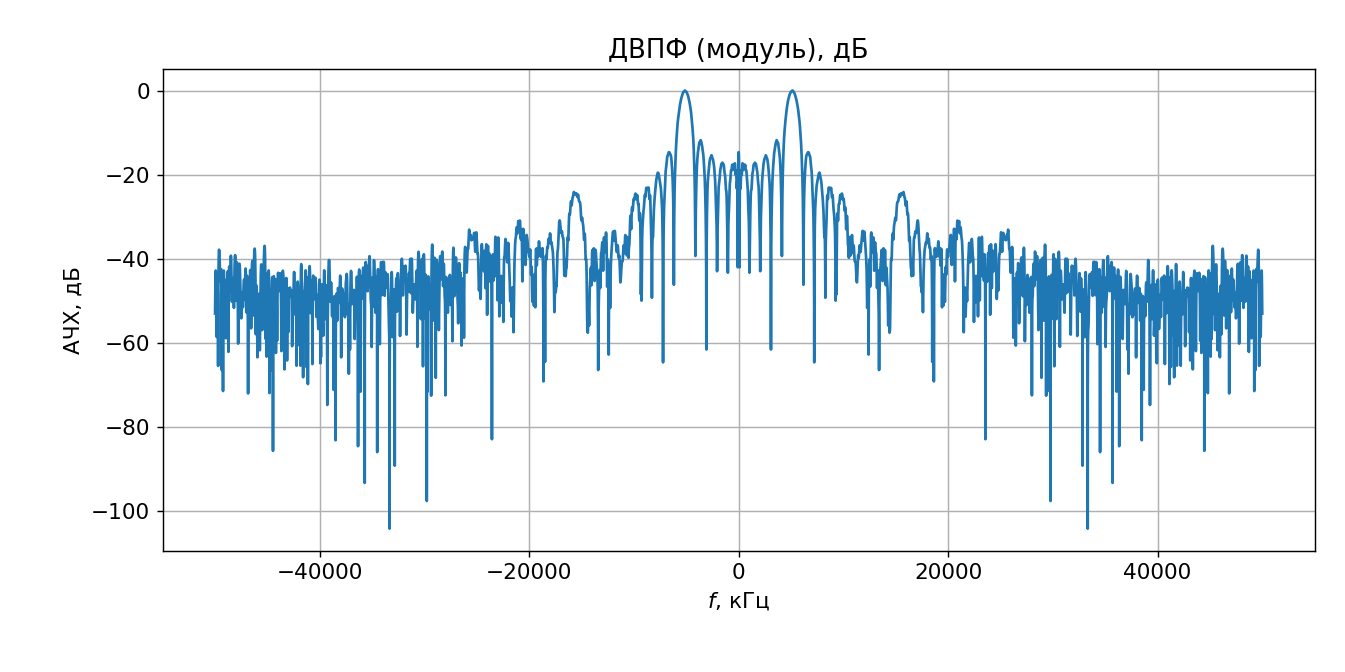

In [6]:
analyse(file='data/1-3-n1.txt', const_level=0, window='boxcar')

> Ширина на уровне -3 Дб равна:  5576 - 4676 = 900 кГц

> Ширина на уровне -6 Дб равна - 5747 - 4517 = 1230 кГц

> Уровень максимального бокового лепестка относительно главного:

        Левый: -14,616 дБ, Правый: -11,780 дБ

> Частота синусоиды - 5140 кГц

<IPython.core.display.Javascript object>


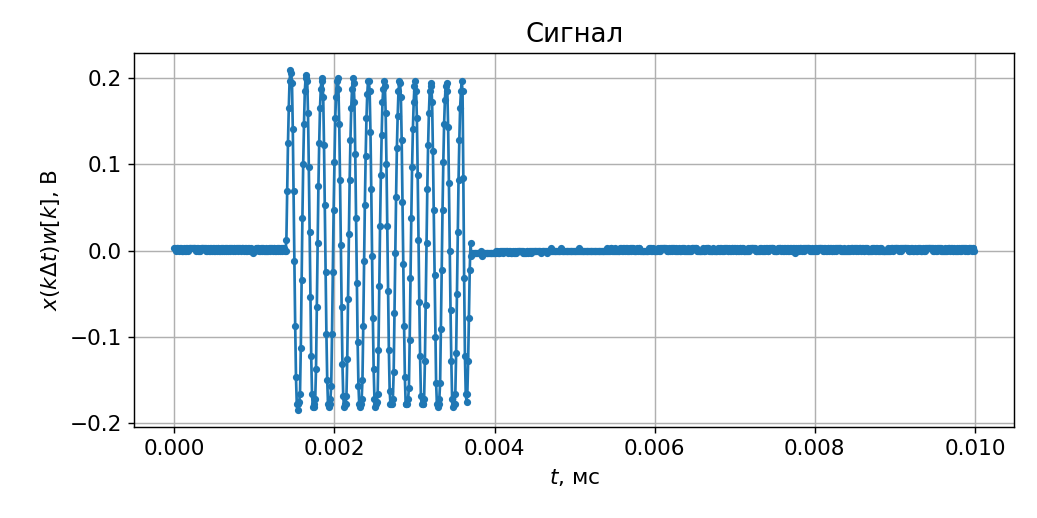

<IPython.core.display.Javascript object>


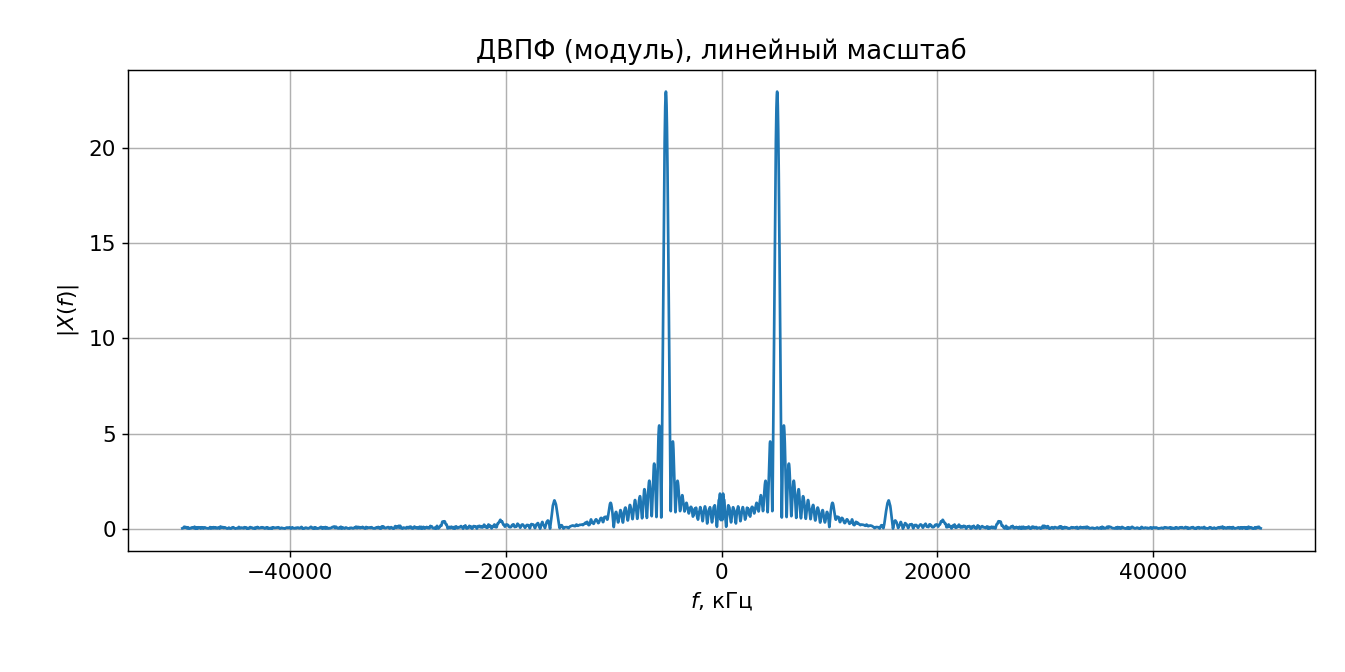

<IPython.core.display.Javascript object>


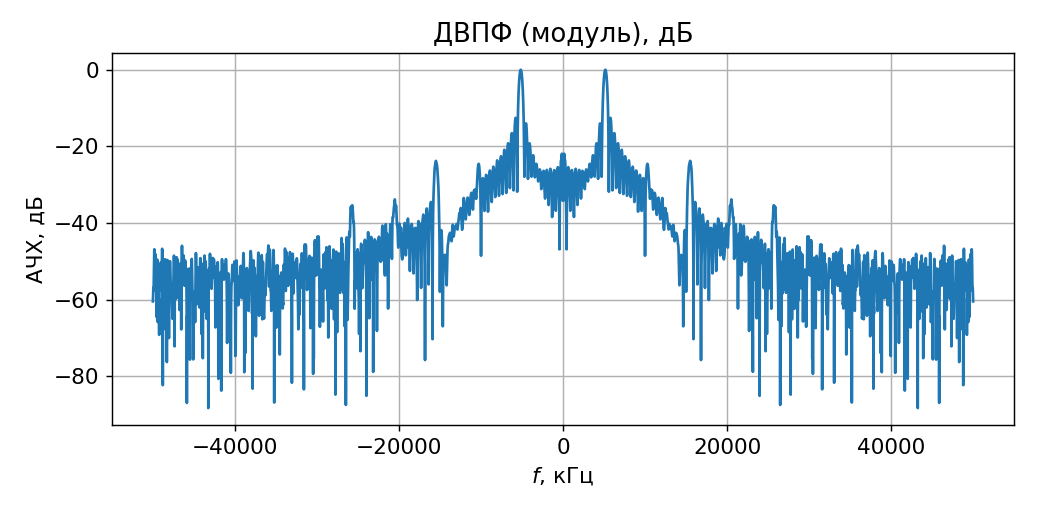

In [7]:
analyse(file='data/1-3-n2.txt', const_level=0, window='boxcar')

> Ширина на уровне -3 Дб равна:  5357 - 4961 = 396 кГц

> Ширина на уровне -6 Дб равна - 5419 - 4888 = 531 кГц

> Уровень максимального бокового лепестка относительно главного: 

        Левый: -13,92 дБ, Правый: -12,52 дБ

> Частота синусоиды - 5160 кГц



### Выведем аналитически спеткр отрезка синусоиды:

Спектр синусоиды:
$$ \frac{e^{i\omega_0 t} - e^{-i\omega_0 t}}{2i} $$

Спектр окна:
$$ \tau sinc{\frac{\omega\tau}{2}}$$

Спектр отрезка синусоиды:
$$ \frac{\tau}{2i} (sinc{\frac{(\omega - \omega_{0})\tau}{2}} + sinc{\frac{(\omega + \omega_{0})\tau}{2}})$$

<IPython.core.display.Javascript object>


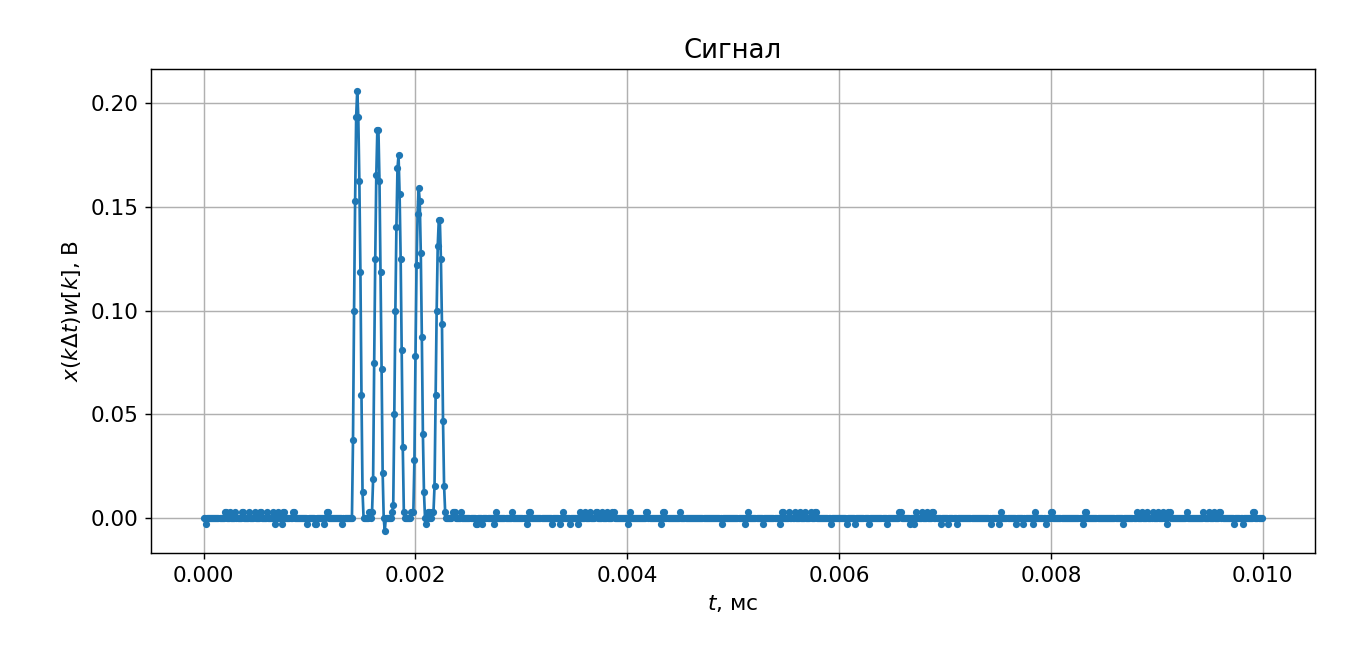

<IPython.core.display.Javascript object>


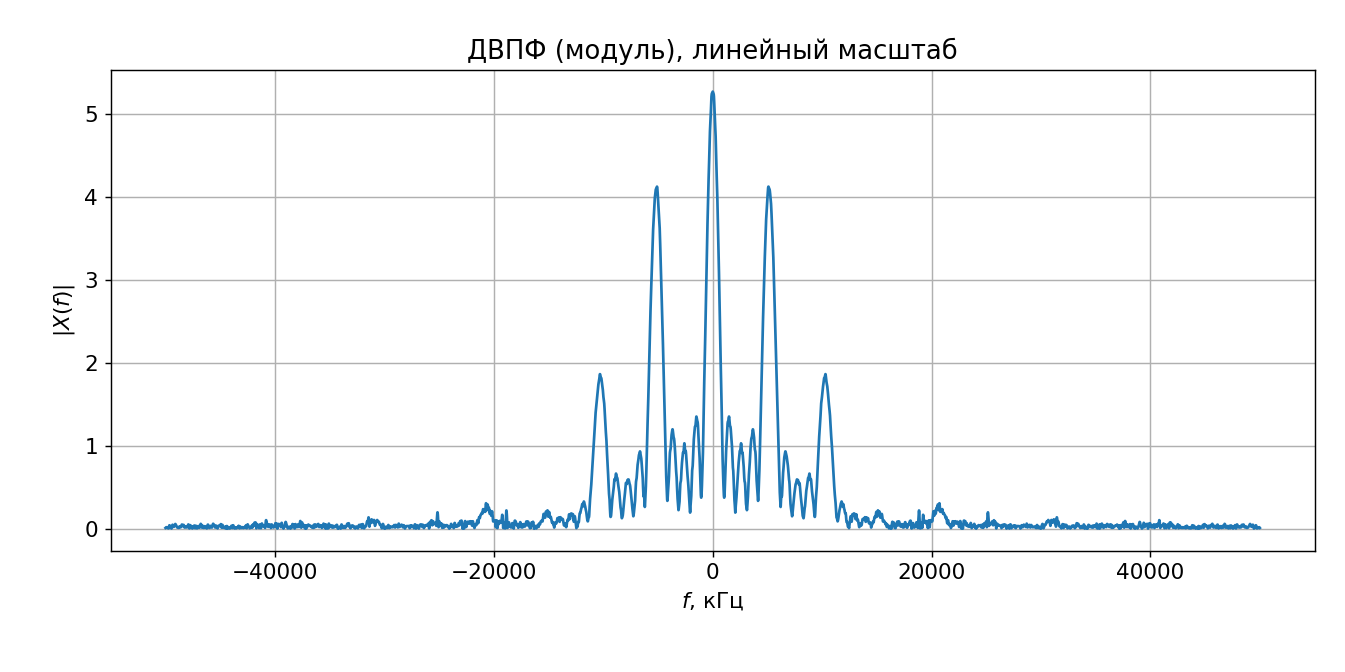

<IPython.core.display.Javascript object>


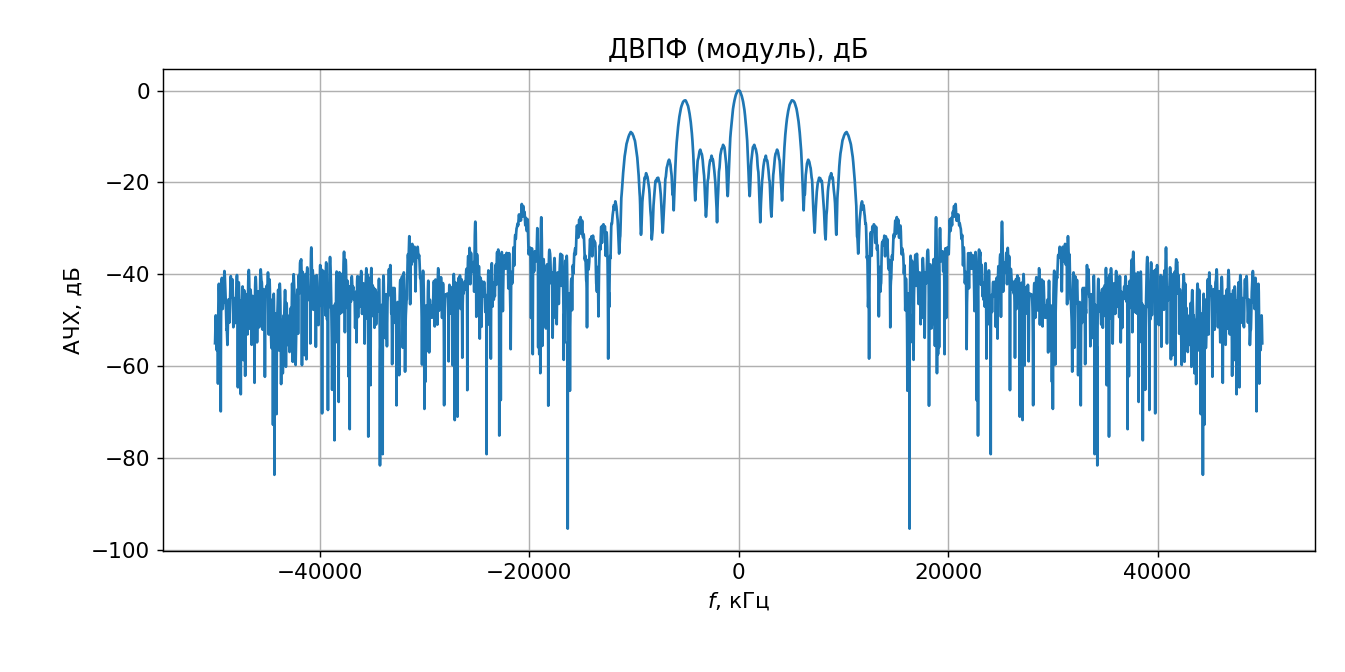

In [8]:
analyse(file='data/1-4-n1.txt', const_level=-0.003, window='boxcar')

> Ширина на уровне -3 Дб равна:  457 - (- 473) = 930 кГц

> Ширина на уровне -6 Дб равна:  635 - (- 639) = 1274 кГц

> Уровень первого бокового лепестка относительно главного:

        Левый: -11,79 дБ, Правый: -11,79 дБ
        
> Частота синусоиды - 5130 кГц




<IPython.core.display.Javascript object>


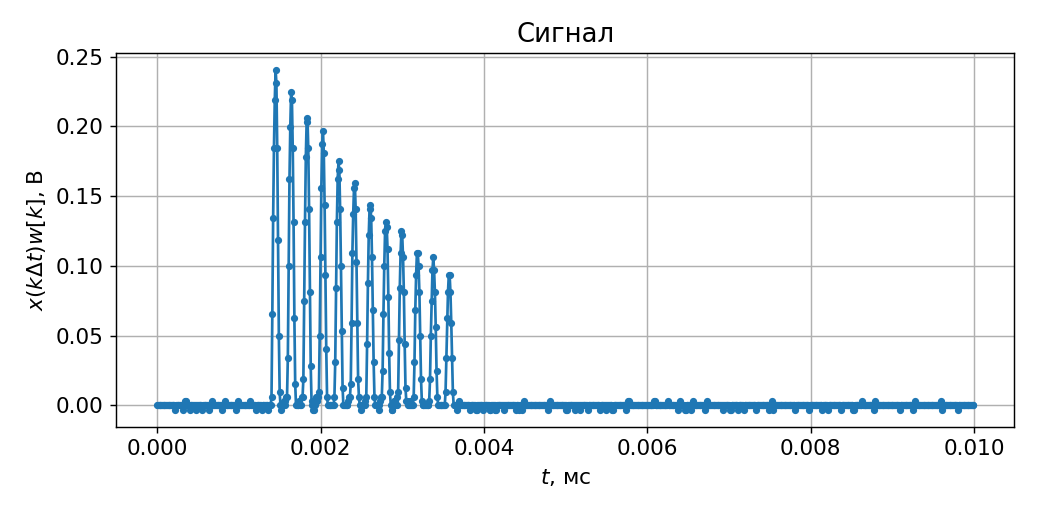

<IPython.core.display.Javascript object>


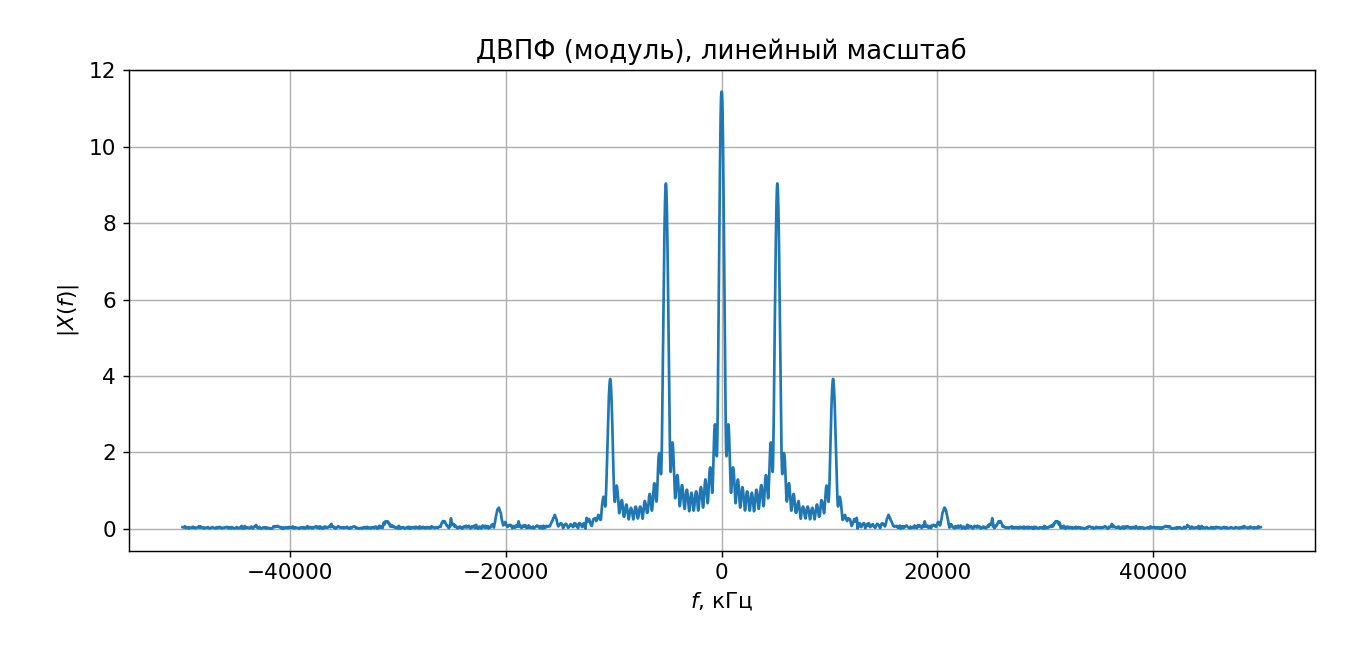

<IPython.core.display.Javascript object>


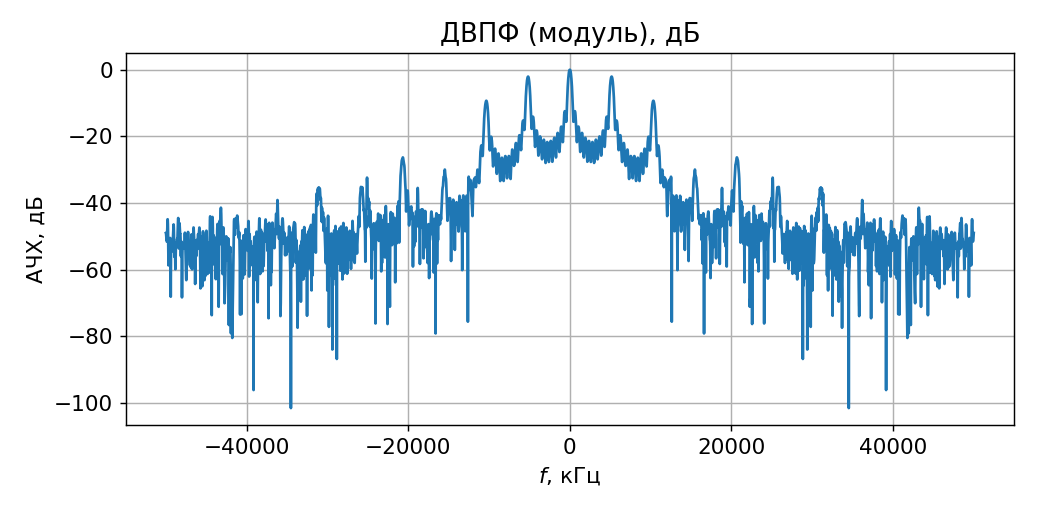

In [9]:
analyse(file='data/1-4-n2.txt', const_level=-0.00933, window='boxcar')

> Ширина на уровне -3 Дб равна:  204 - (-203) = 407 кГц

> Ширина на уровне -6 Дб равна - 278 - (- 277) = 555 кГц

> Уровень первого бокового лепестка относительно главного:

        Левый: -12,43 дБ, Правый: -12,43 дБ

> Частота синусоиды - 5171 кГц

<IPython.core.display.Javascript object>


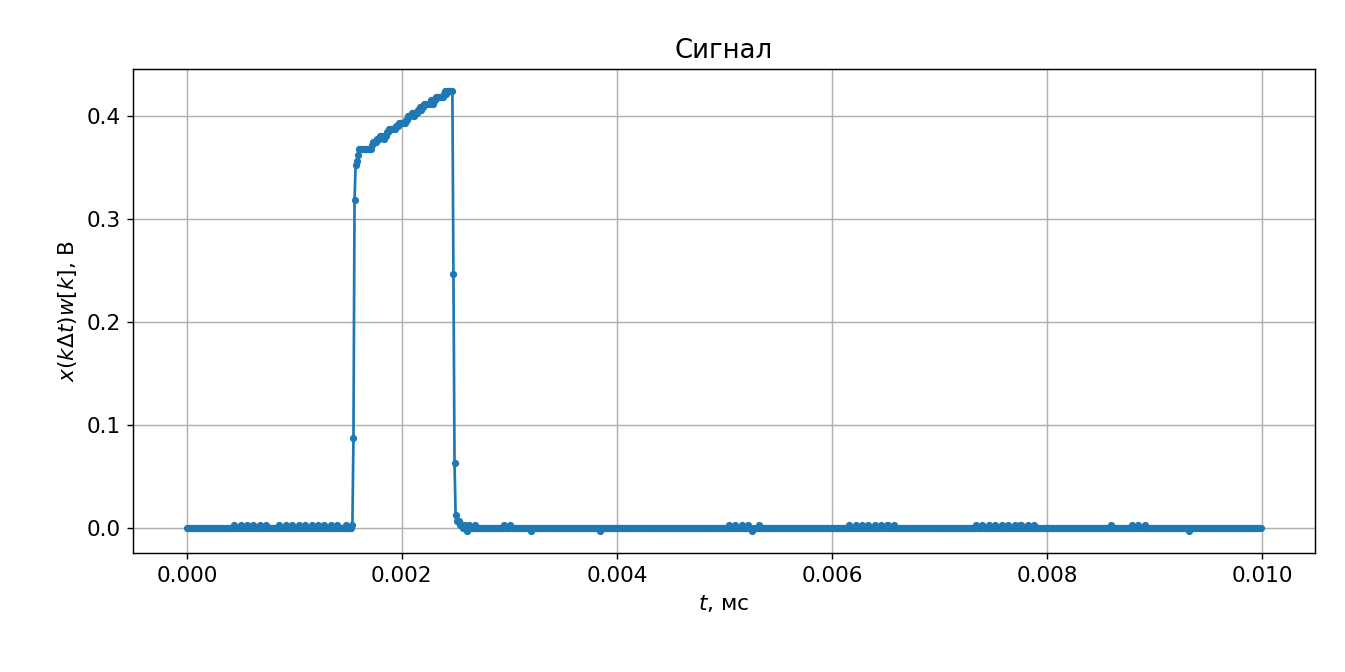

<IPython.core.display.Javascript object>


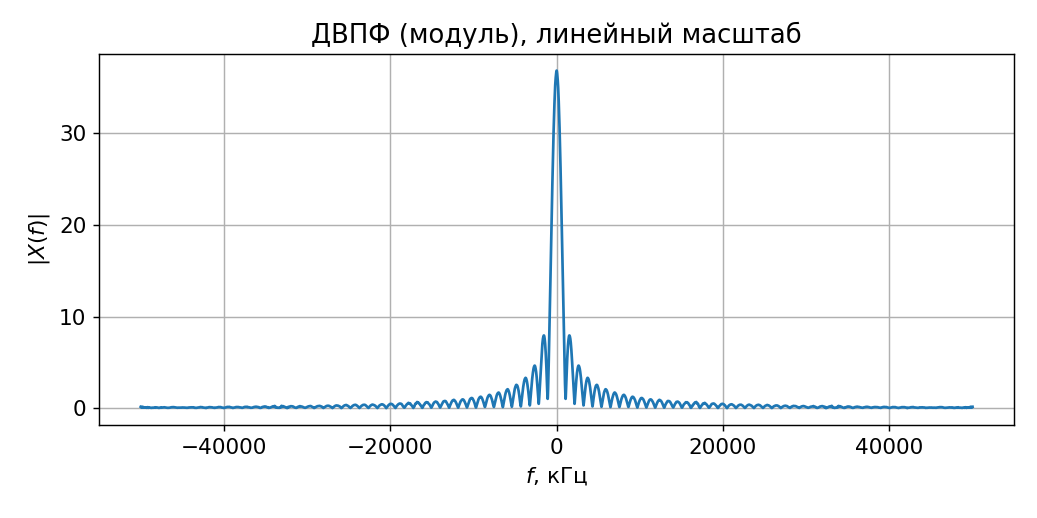

<IPython.core.display.Javascript object>


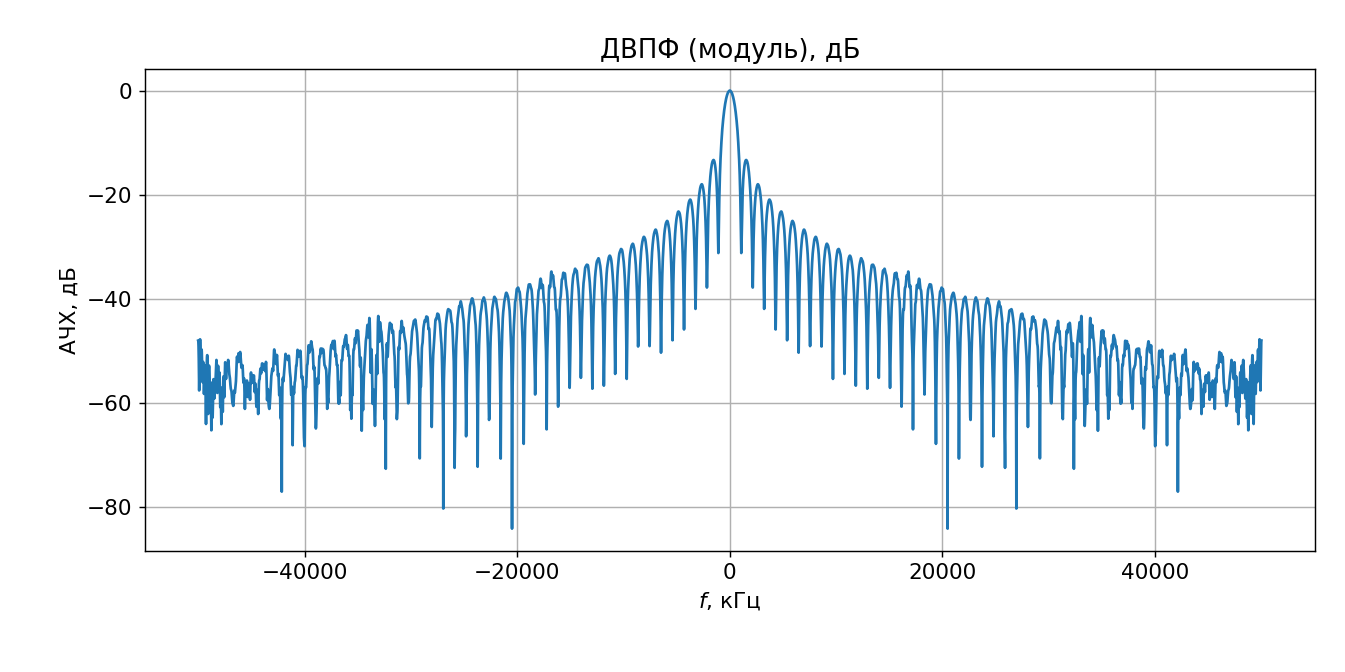

In [10]:
analyse(file='data/2-1-n1.txt', const_level=-0.05, window='boxcar')

> Ширина на уровне -3 Дб равна:  474 - (-471) = 945 кГц

> Ширина на уровне -6 Дб равна: 650 - (-650) = 1300 кГц

> Уровень первого бокового лепестка относительно главного: -13,3 дБ





<IPython.core.display.Javascript object>


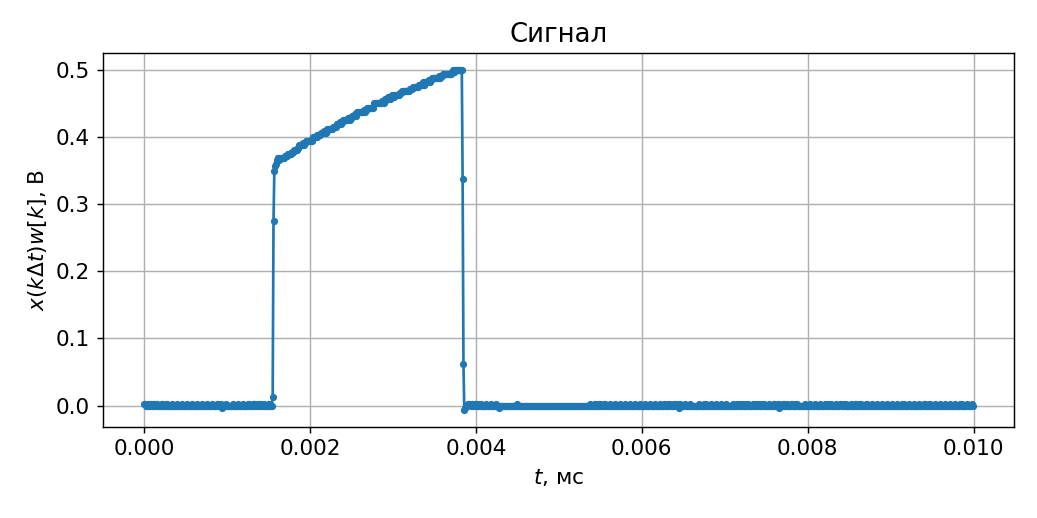

<IPython.core.display.Javascript object>


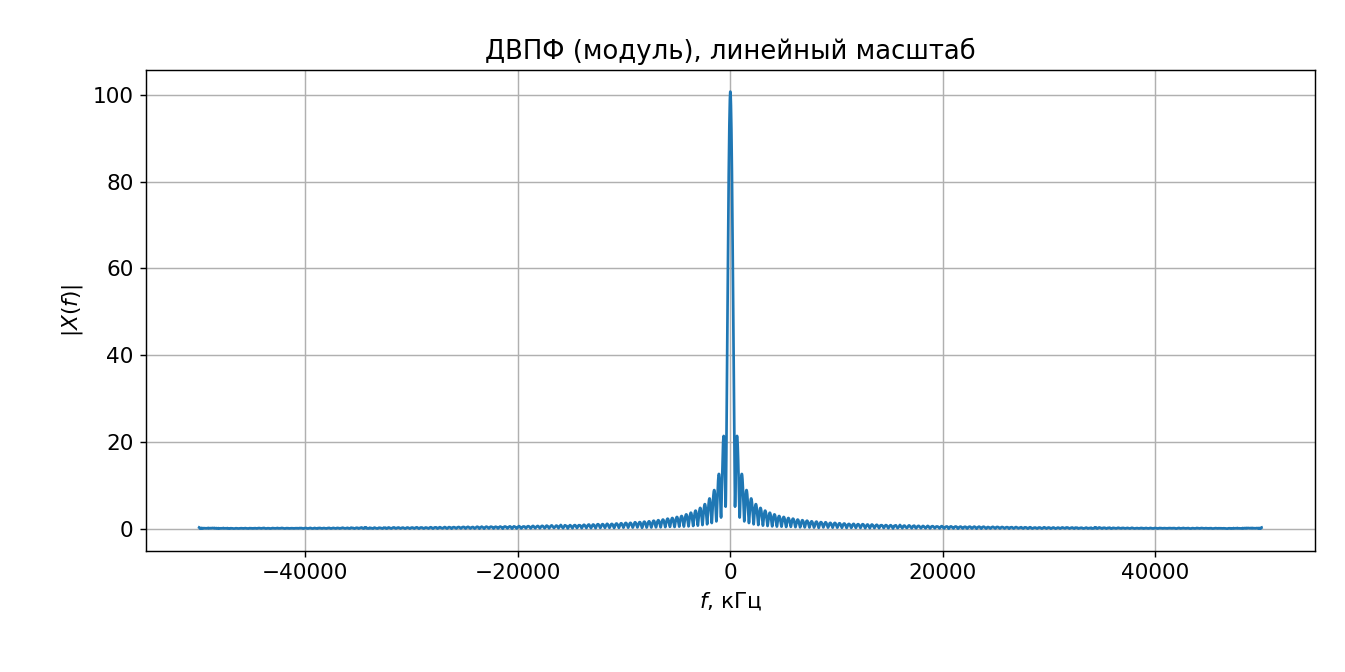

<IPython.core.display.Javascript object>


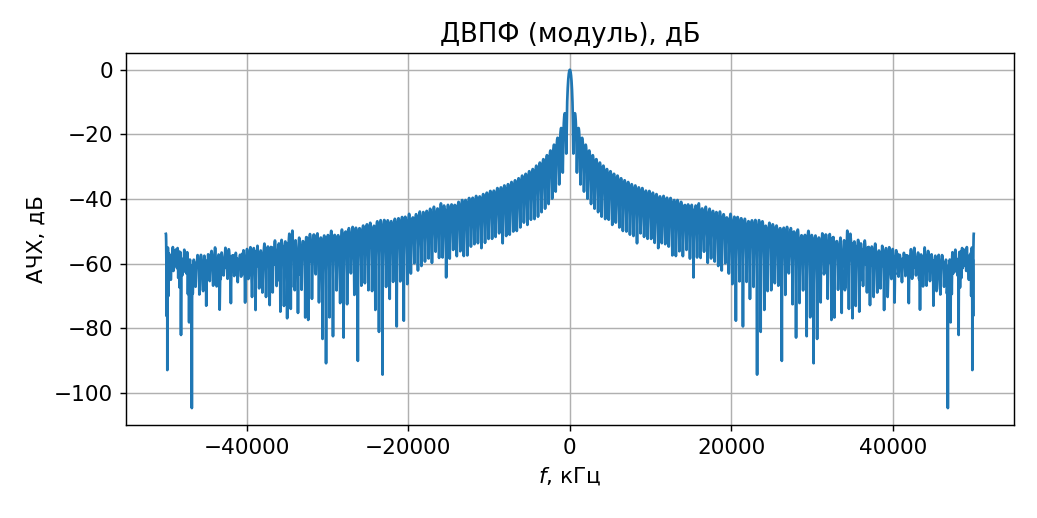

In [11]:
analyse(file='data/2-1-n2.txt', const_level=-0.05, window='boxcar')

> Ширина на уровне -3 Дб равна:  195 - (-195) = 390 кГц

> Ширина на уровне -6 Дб равна: 265 - (-265) = 530 кГц

> Уровень первого бокового лепестка относительно гланого: -13,45 дБ

Спектр окна:

\begin{equation}
  x(t) =
    \begin{cases}
      1 & -\tau/2 < t < \tau/2 \\
      0 & \text{в другом случае}
    \end{cases}       
\end{equation}

$$ X(\omega) = \int_{-\infty}^{\infty} x(t)e^{i\omega t} dt = \int_{-\frac{\tau}{2}}^{\frac{\tau}{2}} e^{i\omega t} dt = \frac{1}{i\omega}(e^{\frac{i\omega\tau}{2}} - e^{\frac{-i\omega\tau}{2}}) = \tau sinc{\frac{\omega\tau}{2}} $$

<IPython.core.display.Javascript object>


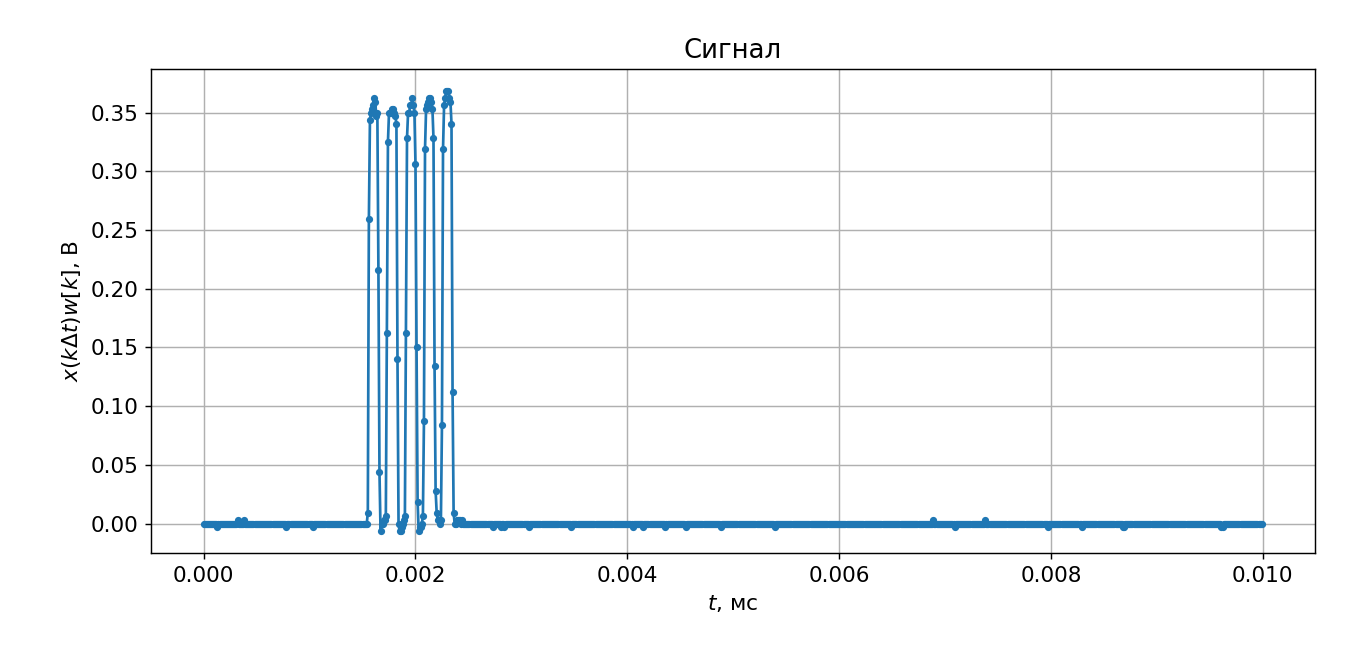

<IPython.core.display.Javascript object>


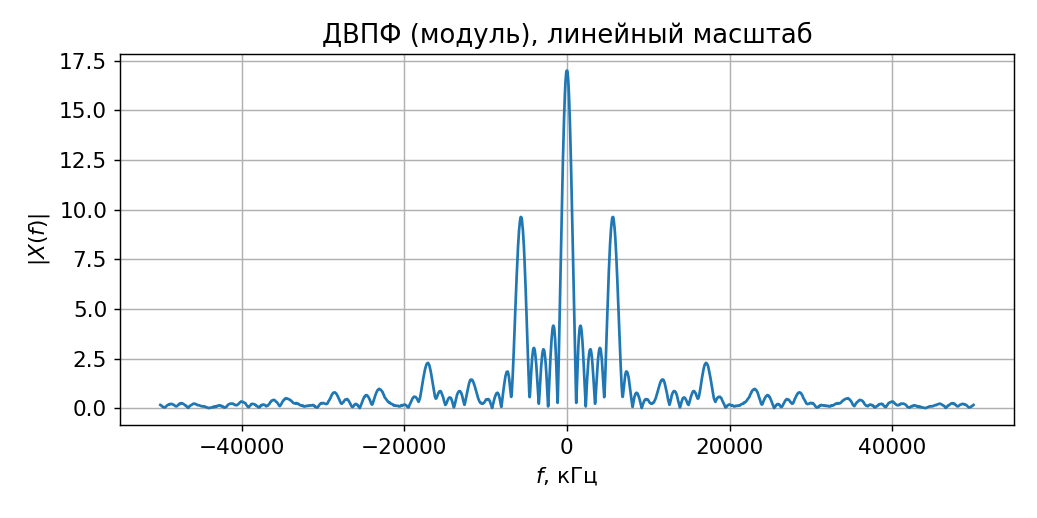

<ipython-input-5-04f4a29b325f>:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


<IPython.core.display.Javascript object>


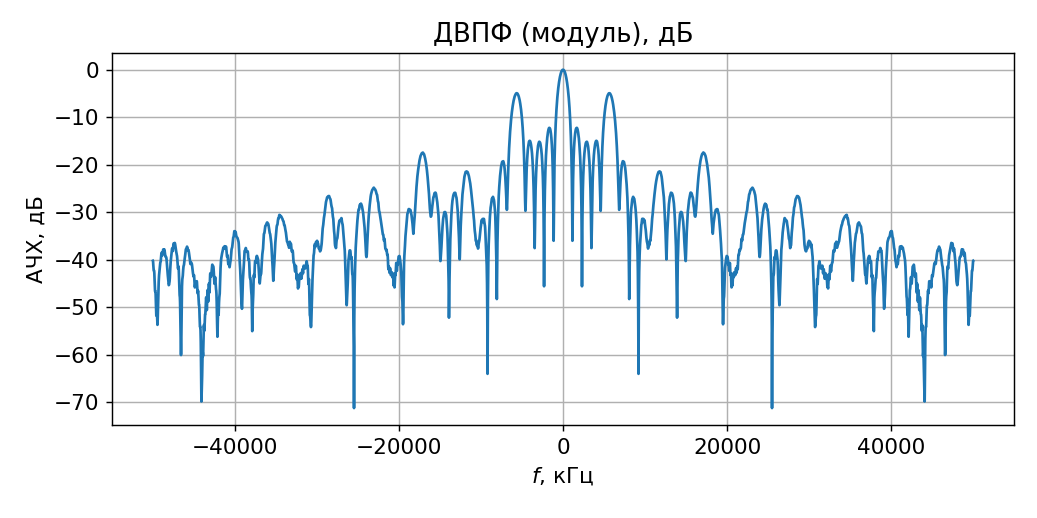

In [12]:
analyse(file='data/3-1-n1.txt', const_level=-0.05, window='boxcar')

<IPython.core.display.Javascript object>


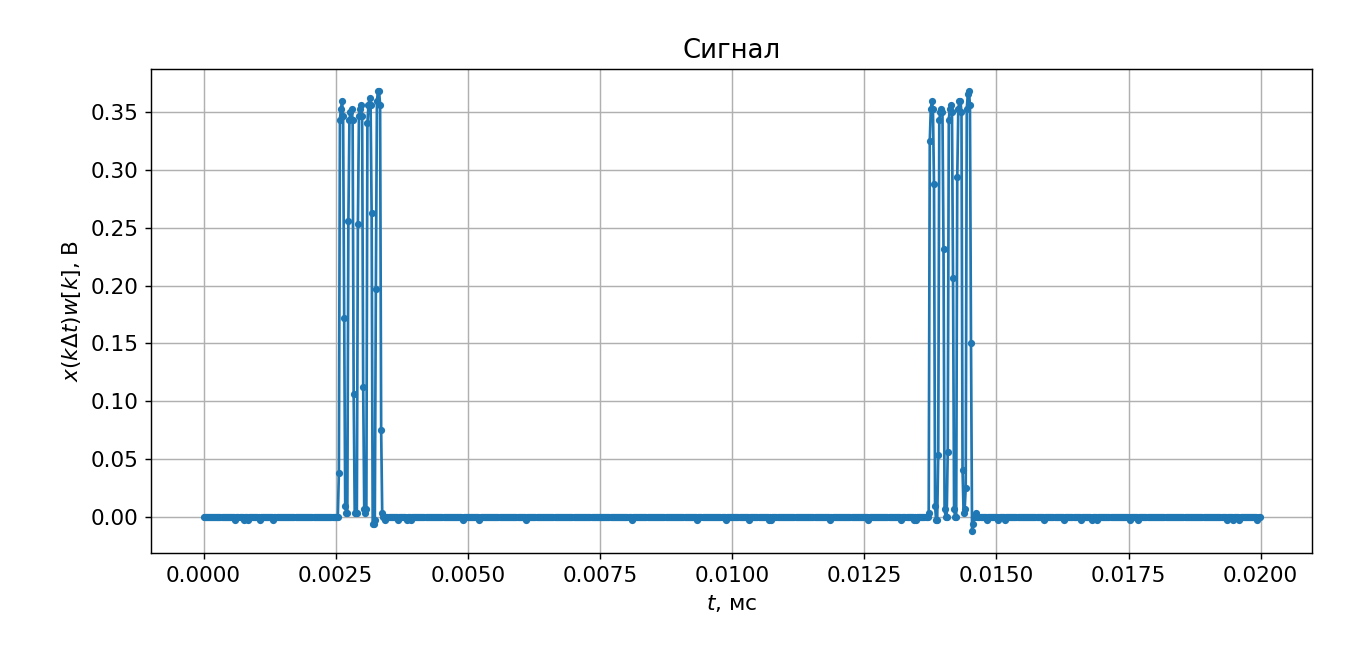

<IPython.core.display.Javascript object>


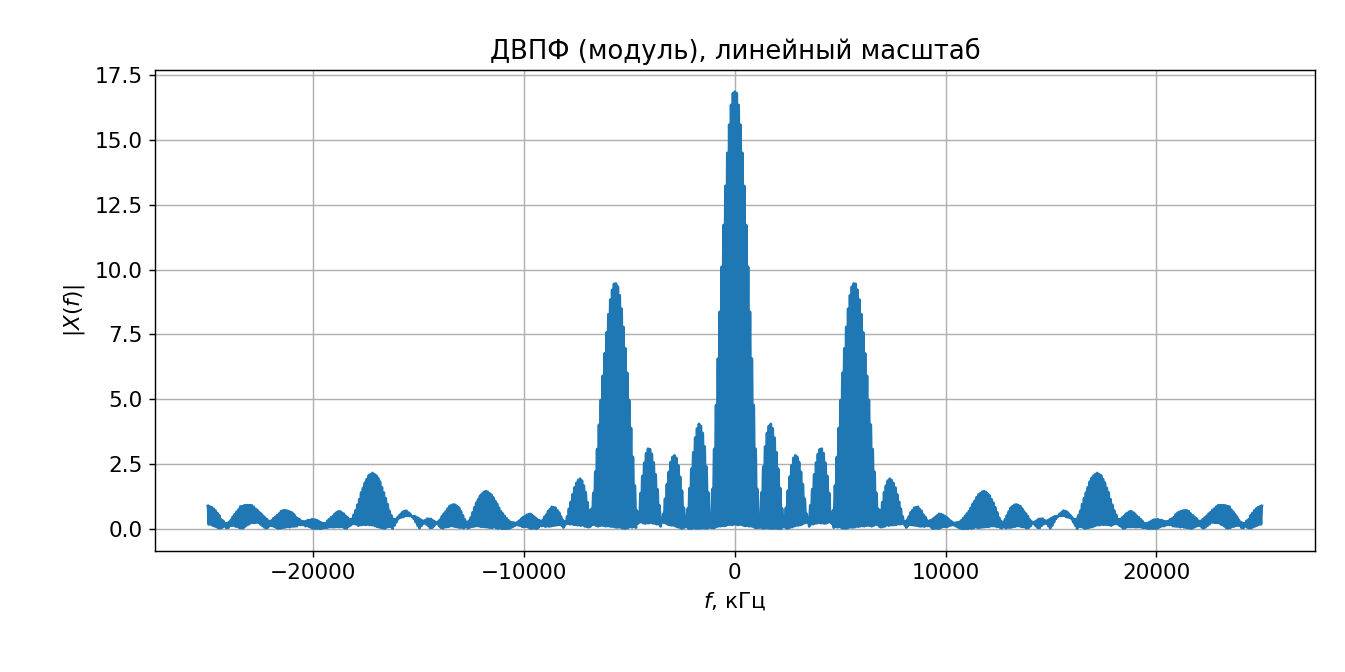

<IPython.core.display.Javascript object>


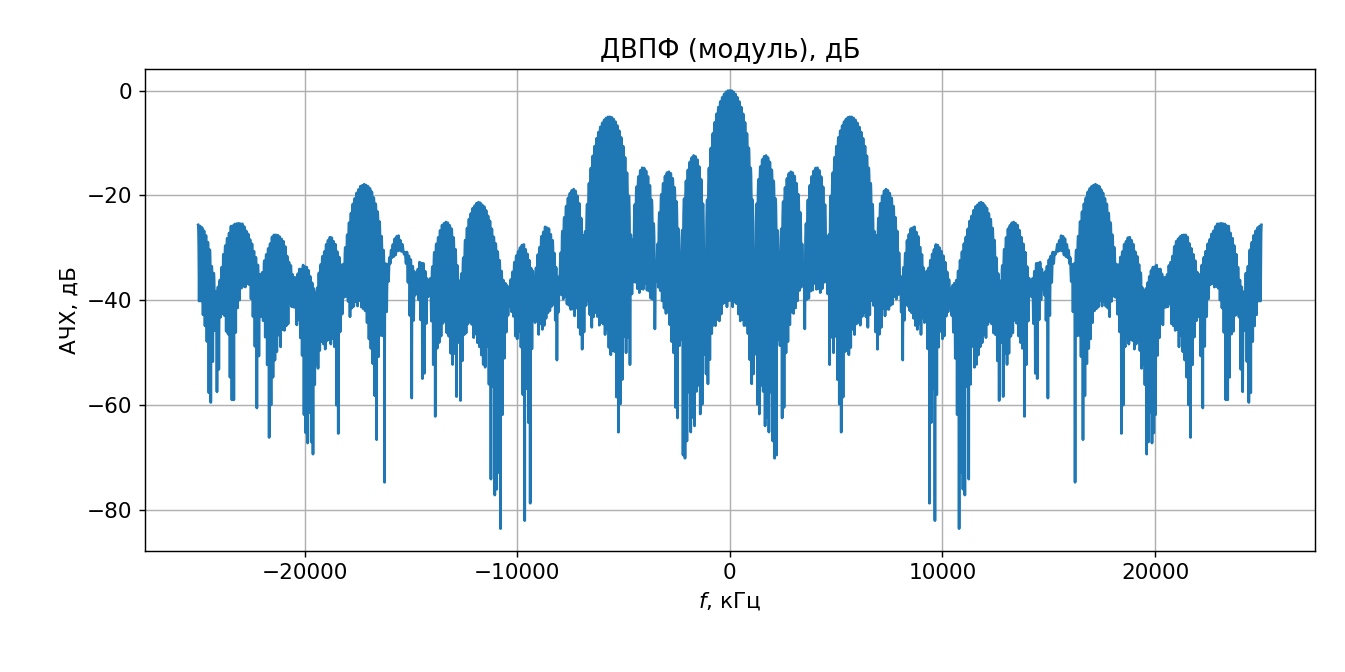

In [13]:
analyse(file='data/3-2-n1.txt', const_level=-0.05, window='boxcar')

<IPython.core.display.Javascript object>


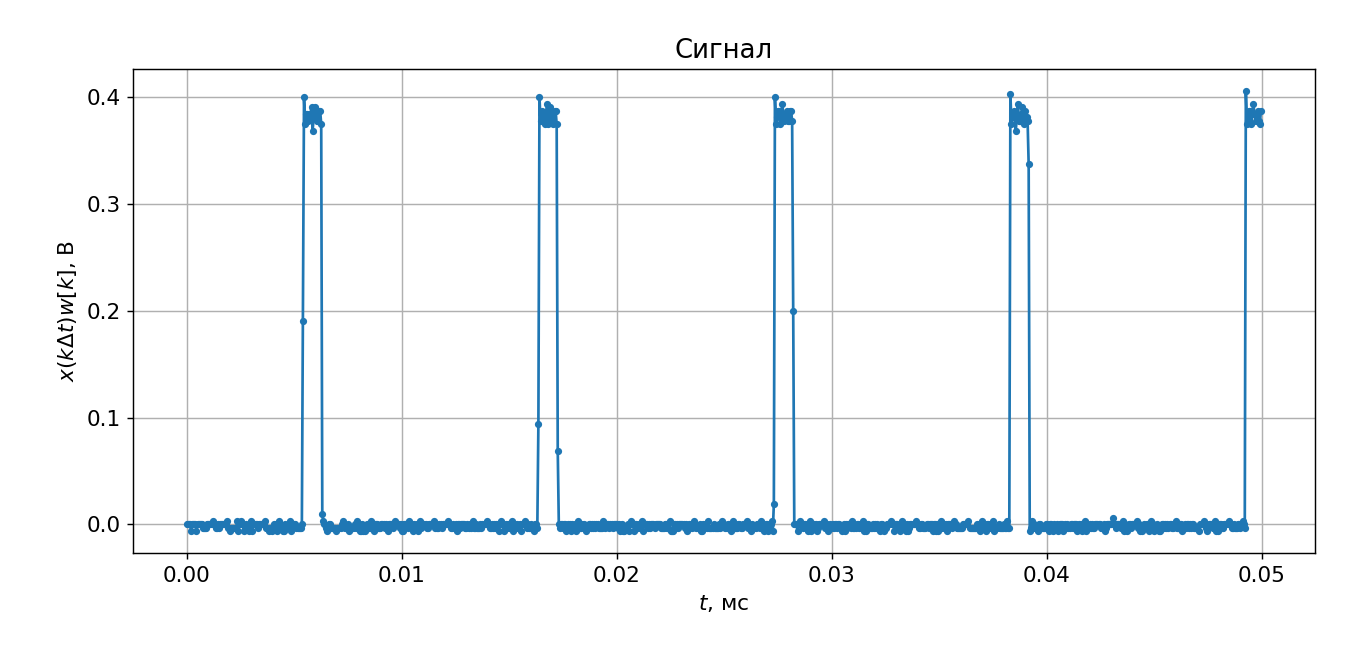

<IPython.core.display.Javascript object>


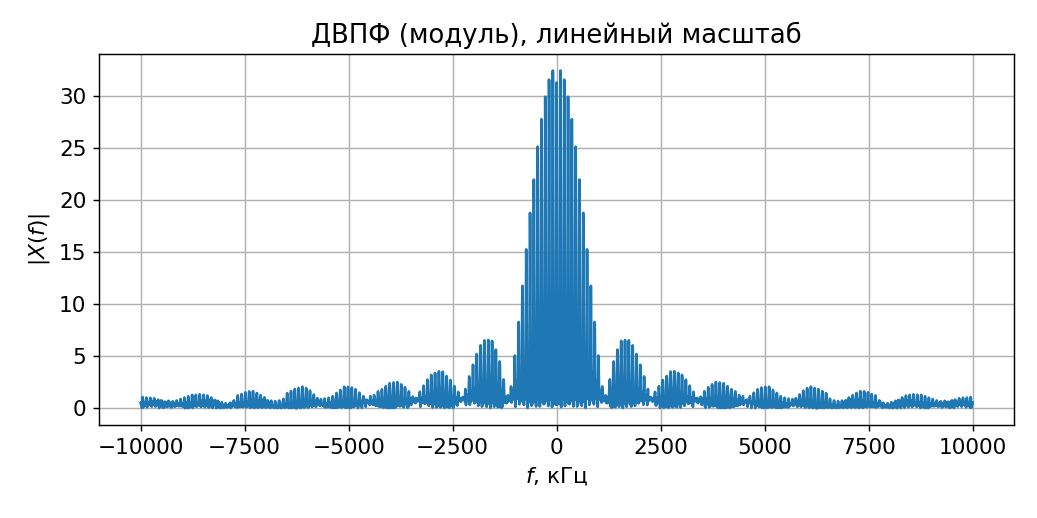

<IPython.core.display.Javascript object>


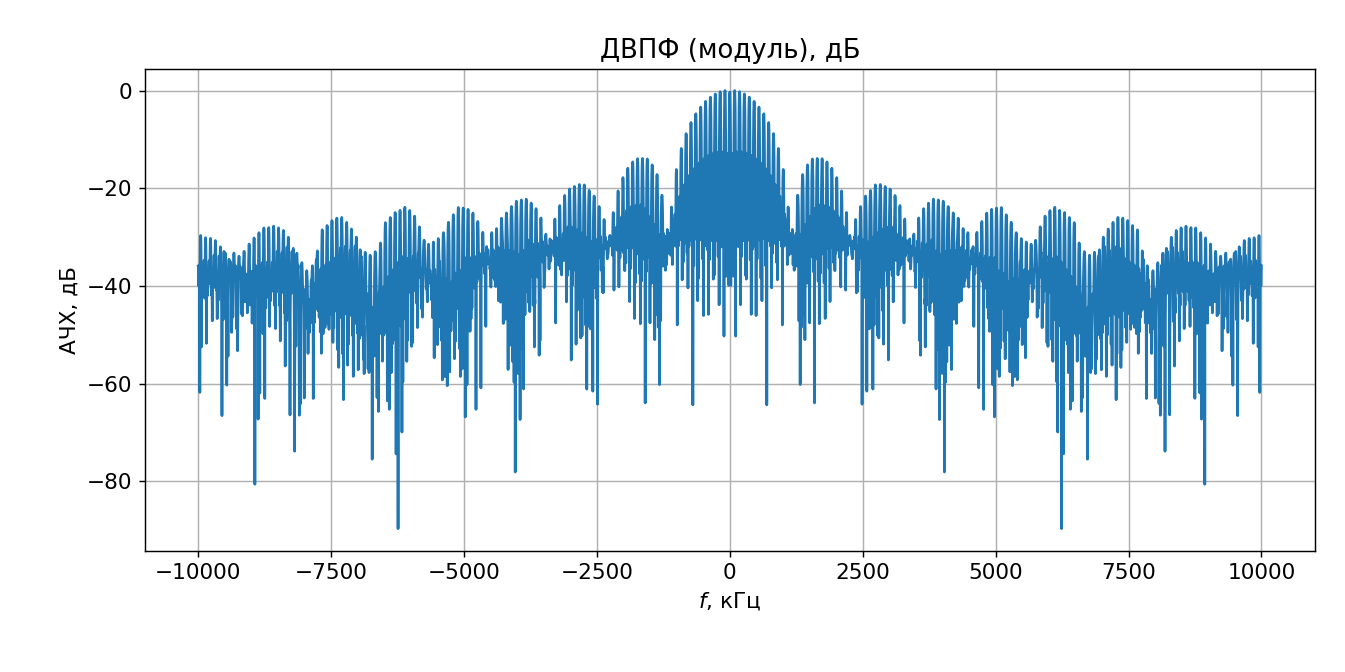

In [14]:
analyse(file='data/3-3-n1.txt', const_level=-0.05, window='boxcar')

### Спектр пачки прямоугольных импульсов

Спектр одного прямоугольного импульса:
$$ X_{1}(\omega) = \tau sinc{\frac{\omega\tau}{2}} $$

Спектр пачки:
$$ X(\omega) = \sum_{k=0}^{N - 1} X_{1}(\omega) e^{ik\omega T} = X_{1}(\omega) \frac{1 - e^{i\omega (N - 1)T}}{1 - e^{i\omega T}}  = X_{1}(\omega) e^{-i\omega \frac{T}{2}(N-1)} \frac{e^{i\omega \frac{T}{2}(N - 1)} - e^{-i\omega \frac{T}{2}(N - 1)}} {e^{i\omega \frac{T}{2}} - e^{-i\omega \frac{T}{2}}} = $$


$$= X_{1}(\omega) e^{-i\omega \frac{T}{2}(N-1)} \frac{sin{\frac{\omega NT}{2}}}{sin{\frac{\omega T}{2}}} = \tau sinc{\frac{\omega\tau}{2}} e^{-i\omega \frac{T}{2}(N-1)} \frac{sin{\frac{\omega NT}{2}}}{sin{\frac{\omega T}{2}}} $$

Спектр пачки пачек также получаем по аналогии.
